### Objective
The objective of this python notebook is to use MLP regression to predict monthly crude palm oil prices.



#### Data
The dataset is available at the following links:https://www.indexmundi.com/commodities/?commodity=palm-oil&months=300.

#### Mount Google Drive to Google Colab Notebook

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#### Use pip to install required packages: sklearn

In [3]:
!pip install sklearn

#### Import the required libraries

In [4]:
import math
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

#### Load the dataset using the following code:

In [5]:
data = pd.read_csv("/content/gdrive/MyDrive/Univariate Crude Palm Oil Price Prediction/Data/crude_palmoil_price.csv",usecols=[1])

In [6]:
data.head()

,cpo_pri
0,281
1,272
2,279
3,291
4,284


Text(0, 0.5, 'cpo_pri')

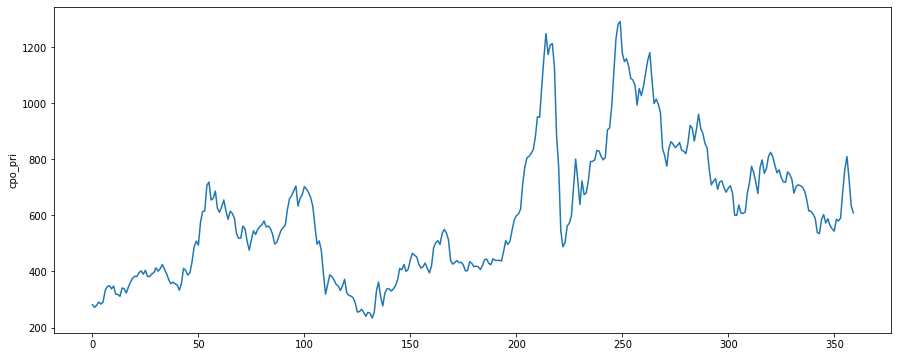

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))
plt.plot(data)
plt.ylabel('cpo_pri')

#### Split the dataset into test and train sets.

In [9]:
train_len = 360
train = data[0:train_len] # first 120 months as training set
test = data[train_len:] # last 24 months as out-of-time test set
train_data_ts_log = np.log10(train['cpo_pri'])

#### Convert an array of values into a dataset matrix

In [10]:
def create_data(data, look_back=1):
    m = len(data)
    X = []
    y = []
    for i in range(look_back, m):
        X.append(data[i - look_back: i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

In [11]:
look_back = 3
X_train, y_train = create_data(train_df.values, look_back=look_back)
X_test, y_test = create_data(test_df.values, look_back=look_back)

#### Build and train the model on our train dataset:

In [13]:
from keras.models import Sequential
from keras.layers import Dense

#### Set the hyper-parameters needed to build the model

In [14]:
model = Sequential()
model.add(Dense(12, input_dim=look_back, activation='relu'))
model.add(Dense(18, activation='relu'))
model.add(Dense(1))

#### Build the model and build, compile, and train the model:

In [15]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=400, batch_size=2, verbose=2)

Epoch 1/400
119/119 - 1s - loss: 361315.0312
Epoch 2/400
119/119 - 0s - loss: 120174.2656
Epoch 3/400
119/119 - 0s - loss: 11243.6250
Epoch 4/400
119/119 - 0s - loss: 5819.6973
Epoch 5/400
119/119 - 0s - loss: 5857.1758
Epoch 6/400
119/119 - 0s - loss: 5648.4307
Epoch 7/400
119/119 - 0s - loss: 5240.1421
Epoch 8/400
119/119 - 0s - loss: 4919.2568
Epoch 9/400
119/119 - 0s - loss: 4877.3198
Epoch 10/400
119/119 - 0s - loss: 4993.8501
Epoch 11/400
119/119 - 0s - loss: 4466.6768
Epoch 12/400
119/119 - 0s - loss: 4264.4336
Epoch 13/400
119/119 - 0s - loss: 4250.1558
Epoch 14/400
119/119 - 0s - loss: 4040.3271
Epoch 15/400
119/119 - 0s - loss: 3839.3135
Epoch 16/400
119/119 - 0s - loss: 3675.9822
Epoch 17/400
119/119 - 0s - loss: 3166.0352
Epoch 18/400
119/119 - 0s - loss: 3454.9956
Epoch 19/400
119/119 - 0s - loss: 3154.6782
Epoch 20/400
119/119 - 0s - loss: 2930.0251
Epoch 21/400
119/119 - 0s - loss: 3025.8833
Epoch 22/400
119/119 - 0s - loss: 2892.3069
Epoch 23/400
119/119 - 0s - loss: 23

#### Evaluate the model and print the Mean Square Error (MSE) and the Root Mean Square Error (RMSE):

In [16]:
score = model.evaluate(X_test, y_test)
print('\nTest mse:', score)
print('Test rmse:', math.sqrt(score))

4/4 [==============================] - 0s 3ms/step - loss: 3116.7271

Test mse: 3116.72705078125
Test rmse: 55.827654892367185


#### Predict the values using the MLP model and plot them, both for test and train datasets:

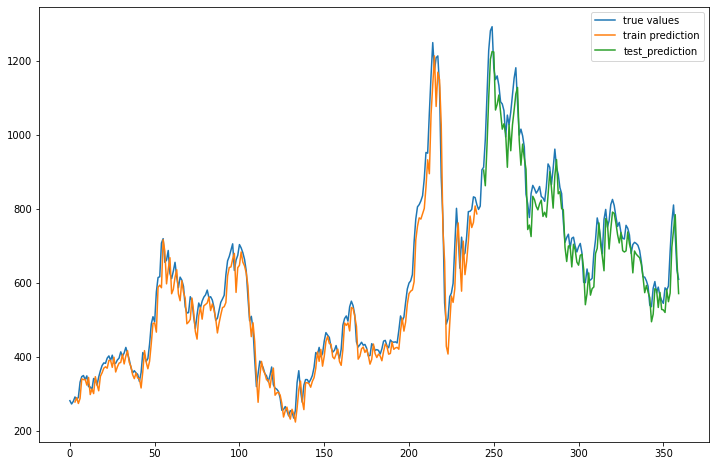

In [17]:
plt.figure(figsize=(12, 8))
train_prediction = model.predict(X_train)
train_stamp = np.arange(look_back, look_back + X_train.shape[0])
test_prediction = model.predict(X_test)
test_stamp = np.arange(2 * look_back + X_train.shape[0], len(data))
plt.plot(data, label='true values')
plt.plot(train_stamp, train_prediction, label='train prediction')
plt.plot(test_stamp, test_prediction, label = 'test_prediction')
plt.legend();